In [1]:
import numpy as np
import PIL.Image

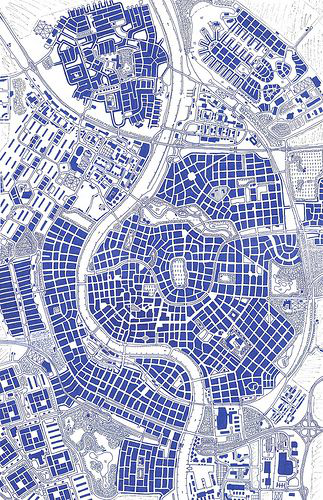

In [2]:
original = PIL.Image.open('./original.jpg')
original

In [3]:
fft = np.fft.fft(np.reshape(np.array(original), (-1, 3)), axis=0)
fft.shape

(161500, 3)

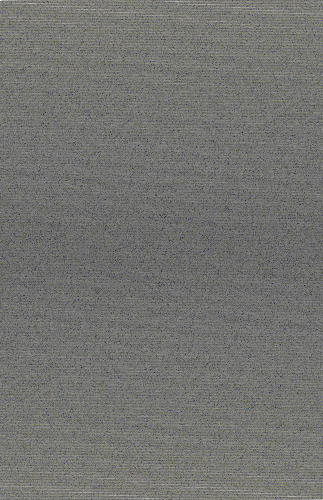

In [4]:
fft_vis = np.reshape(fft, (original.height, original.width, 3))
fft_vis = np.abs(fft_vis)
fft_vis = np.log(fft_vis)
fft_vis = fft_vis - fft_vis.min()
fft_vis = fft_vis / fft_vis.max()
fft_vis = fft_vis * 255
PIL.Image.fromarray((fft_vis).astype(np.uint8))

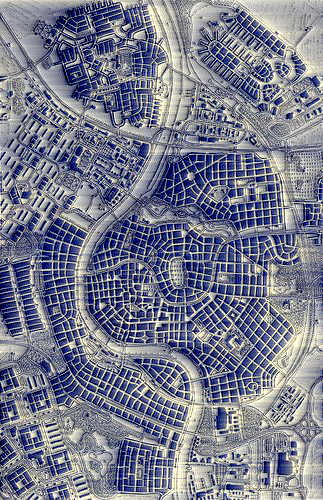

In [5]:
angle = np.pi * .25
decohered = fft * (np.cos(angle) + np.sin(angle) * 1j)
decohered[len(decohered) // 2 + 1:] = np.conjugate(decohered[1 : len(decohered) // 2][::-1])

modified = np.fft.ifft(decohered, axis=0)
modified = np.reshape(modified, (original.height, original.width, 3))
modified = np.real(modified)
modified = np.clip(modified, 0, 255)
reconstructed = PIL.Image.fromarray(modified.astype(np.uint8))
reconstructed.save('./reconstructed.png')
reconstructed